# 10 Minutes to pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# ====================================================================================================
# ==== Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns ======
# ====================================================================================================

dates = pd.date_range('20130101', periods = 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.135001,-1.340690,-0.054139,1.276739
2013-01-02,0.173451,0.427176,0.733848,1.222978
2013-01-03,-0.033107,0.307616,1.368079,0.192685
2013-01-04,-0.068335,-1.293467,2.383703,-0.281083
2013-01-05,-0.230605,-1.204707,1.445203,-0.864123
2013-01-06,-0.041971,-1.141002,0.590554,0.010146


In [5]:
# ====================================================================================================
# ==================== Creating a DataFrame by passing a dict of objects =============================
# ====================================================================================================

df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# ====================================================================================================
# ===================================== Having specific dtypes =======================================
# ====================================================================================================

df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

In [7]:
# ====================================================================================================
# =============== head(), tail(), index(), columns(), values(), describe(), info() ===================
# ====================================================================================================

df.head()

,A,B,C,D
2013-01-01,0.135001,-1.340690,-0.054139,1.276739
2013-01-02,0.173451,0.427176,0.733848,1.222978
2013-01-03,-0.033107,0.307616,1.368079,0.192685
2013-01-04,-0.068335,-1.293467,2.383703,-0.281083
2013-01-05,-0.230605,-1.204707,1.445203,-0.864123


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.068335,-1.293467,2.383703,-0.281083
2013-01-05,-0.230605,-1.204707,1.445203,-0.864123
2013-01-06,-0.041971,-1.141002,0.590554,0.010146


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 0.13500059, -1.3406898 , -0.05413916,  1.27673867],
       [ 0.17345124,  0.42717616,  0.7338483 ,  1.22297796],
       [-0.03310671,  0.30761647,  1.36807893,  0.19268533],
       [-0.06833489, -1.29346655,  2.38370252, -0.28108275],
       [-0.23060525, -1.20470713,  1.44520333, -0.86412274],
       [-0.04197084, -1.14100179,  0.59055398,  0.01014571]])

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.010928,-0.707512,1.077875,0.259557
std,0.147173,0.836346,0.843994,0.846695
min,-0.230605,-1.340690,-0.054139,-0.864123
25%,-0.061744,-1.271277,0.626378,-0.208276
50%,-0.037539,-1.172854,1.050964,0.101416
75%,0.092974,-0.054538,1.425922,0.965405
max,0.173451,0.427176,2.383703,1.276739


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [14]:
# ====================================================================================================
# ================================= Transposing the DataFrame ========================================
# ====================================================================================================

df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.135001,0.173451,-0.033107,-0.068335,-0.230605,-0.041971
B,-1.340690,0.427176,0.307616,-1.293467,-1.204707,-1.141002
C,-0.054139,0.733848,1.368079,2.383703,1.445203,0.590554
D,1.276739,1.222978,0.192685,-0.281083,-0.864123,0.010146


In [15]:
# ====================================================================================================
# ===================================== Sorting by an axis ===========================================
# ====================================================================================================

df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.276739,-0.054139,-1.340690,0.135001
2013-01-02,1.222978,0.733848,0.427176,0.173451
2013-01-03,0.192685,1.368079,0.307616,-0.033107
2013-01-04,-0.281083,2.383703,-1.293467,-0.068335
2013-01-05,-0.864123,1.445203,-1.204707,-0.230605
2013-01-06,0.010146,0.590554,-1.141002,-0.041971


In [16]:
# ====================================================================================================
# ===================================== Sorting by values ============================================
# ====================================================================================================

df.sort_values(by='B')

,A,B,C,D
2013-01-01,0.135001,-1.340690,-0.054139,1.276739
2013-01-04,-0.068335,-1.293467,2.383703,-0.281083
2013-01-05,-0.230605,-1.204707,1.445203,-0.864123
2013-01-06,-0.041971,-1.141002,0.590554,0.010146
2013-01-03,-0.033107,0.307616,1.368079,0.192685
2013-01-02,0.173451,0.427176,0.733848,1.222978


## Selection

Note: While standard Python / Numpy expressions for selecting and setting are intuitive and
come in handy for interactive work, for production code, we recommend the optimized pandas
data access methods, .at, .iat, .loc, .iloc and .ix.

### Getting

In [17]:
# ====================================================================================================
# ============== Selecting a single column, which yields a Series, equivalent to df.A ================
# ====================================================================================================

df['A']

2013-01-01    0.135001
2013-01-02    0.173451
2013-01-03   -0.033107
2013-01-04   -0.068335
2013-01-05   -0.230605
2013-01-06   -0.041971
Freq: D, Name: A, dtype: float64

In [18]:
# ====================================================================================================
# ========================== Selecting via [], which slices the rows =================================
# ====================================================================================================

df[0:3]

,A,B,C,D
2013-01-01,0.135001,-1.340690,-0.054139,1.276739
2013-01-02,0.173451,0.427176,0.733848,1.222978
2013-01-03,-0.033107,0.307616,1.368079,0.192685


In [19]:
 df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.173451,0.427176,0.733848,1.222978
2013-01-03,-0.033107,0.307616,1.368079,0.192685
2013-01-04,-0.068335,-1.293467,2.383703,-0.281083


In [20]:
# ====================================================================================================
# ====================================== Selection by Label ==========================================
# ====================================================================================================

df.loc[dates[0]]

A    0.135001
B   -1.340690
C   -0.054139
D    1.276739
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
# ====================================================================================================
# =============================== Selecting on a multi-axis by label =================================
# ====================================================================================================

df.loc[:,['A','B']]

,A,B
2013-01-01,0.135001,-1.340690
2013-01-02,0.173451,0.427176
2013-01-03,-0.033107,0.307616
2013-01-04,-0.068335,-1.293467
2013-01-05,-0.230605,-1.204707
2013-01-06,-0.041971,-1.141002


Showing label slicing, both endpoints are included

In [22]:
# ====================================================================================================
# =========================== Showing label slicing, both endpoints are included =====================
# ====================================================================================================

df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.173451,0.427176
2013-01-03,-0.033107,0.307616
2013-01-04,-0.068335,-1.293467


In [23]:
# ====================================================================================================
# =========================== Reduction in the dimensions of the returned object =====================
# ====================================================================================================

df.loc['20130102',['A','B']]

A    0.173451
B    0.427176
Name: 2013-01-02 00:00:00, dtype: float64

In [24]:
# ====================================================================================================
# ====================================== For getting a scalar value ==================================
# ====================================================================================================

df.loc[dates[0],'A']

0.13500059049923266

For getting fast access to a scalar (equiv to the prior method)

In [25]:
# ====================================================================================================
# ================== For getting fast access to a scalar (equiv to the prior method) =================
# ====================================================================================================

df.at[dates[0],'A']

0.13500059049923266

In [26]:
# ====================================================================================================
# ========================================== Selection by Position ===================================
# ====================================================================================================

df.iloc[3]

A   -0.068335
B   -1.293467
C    2.383703
D   -0.281083
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
# ====================================================================================================
# ============================ By integer slices, acting similar to numpy/python =====================
# ====================================================================================================

df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.068335,-1.293467
2013-01-05,-0.230605,-1.204707


In [28]:
# ====================================================================================================
# ================================= By lists of integer position locations ===========================
# ====================================================================================================

df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.173451,0.733848
2013-01-03,-0.033107,1.368079
2013-01-05,-0.230605,1.445203


In [29]:
# ====================================================================================================
# ======================================= slicing rows explicitly ====================================
# ====================================================================================================

df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.173451,0.427176,0.733848,1.222978
2013-01-03,-0.033107,0.307616,1.368079,0.192685


In [30]:
# ====================================================================================================
# ======================================= slicing columns explicitly =================================
# ====================================================================================================

df.iloc[:,1:3]

,B,C
2013-01-01,-1.340690,-0.054139
2013-01-02,0.427176,0.733848
2013-01-03,0.307616,1.368079
2013-01-04,-1.293467,2.383703
2013-01-05,-1.204707,1.445203
2013-01-06,-1.141002,0.590554


In [31]:
# ====================================================================================================
# =================================== For getting a value explicitly =================================
# ====================================================================================================

df.iloc[1,1]

0.42717615794613306

In [32]:
df.iat[1,1]

0.42717615794613306

### Boolean Indexing

In [33]:
# ====================================================================================================
# ================================= Using a single column’s values to select data ====================
# ====================================================================================================

df[df.A > 0]

,A,B,C,D
2013-01-01,0.135001,-1.340690,-0.054139,1.276739
2013-01-02,0.173451,0.427176,0.733848,1.222978


In [34]:
# ====================================================================================================
# ============================================ A where operation =====================================
# ====================================================================================================

df[df > 0]

,A,B,C,D
2013-01-01,0.135001,NaN,NaN,1.276739
2013-01-02,0.173451,0.427176,0.733848,1.222978
2013-01-03,NaN,0.307616,1.368079,0.192685
2013-01-04,NaN,NaN,2.383703,NaN
2013-01-05,NaN,NaN,1.445203,NaN
2013-01-06,NaN,NaN,0.590554,0.010146


In [35]:
# ====================================================================================================
# ================================== Using the isin() method for filtering ===========================
# ====================================================================================================

df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.135001,-1.340690,-0.054139,1.276739,one
2013-01-02,0.173451,0.427176,0.733848,1.222978,one
2013-01-03,-0.033107,0.307616,1.368079,0.192685,two
2013-01-04,-0.068335,-1.293467,2.383703,-0.281083,three
2013-01-05,-0.230605,-1.204707,1.445203,-0.864123,four
2013-01-06,-0.041971,-1.141002,0.590554,0.010146,three


In [36]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.033107,0.307616,1.368079,0.192685,two
2013-01-05,-0.230605,-1.204707,1.445203,-0.864123,four


### Setting

In [37]:
# ====================================================================================================
# ================== Setting a new column automatically aligns the data by the indexes ===============
# ====================================================================================================

s1 = pd.Series([1,2,3,4,5,6], index = pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df['F'] = s1

Setting values by label

In [39]:
df.at[dates[0],'A'] = 0

Setting values by position

In [40]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [41]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [42]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.054139,5,NaN
2013-01-02,0.173451,0.427176,0.733848,5,1.0
2013-01-03,-0.033107,0.307616,1.368079,5,2.0
2013-01-04,-0.068335,-1.293467,2.383703,5,3.0
2013-01-05,-0.230605,-1.204707,1.445203,5,4.0
2013-01-06,-0.041971,-1.141002,0.590554,5,5.0


In [43]:
# ====================================================================================================
# =================================== A where operation with setting =================================
# ====================================================================================================

df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.054139,-5,NaN
2013-01-02,-0.173451,-0.427176,-0.733848,-5,-1.0
2013-01-03,-0.033107,-0.307616,-1.368079,-5,-2.0
2013-01-04,-0.068335,-1.293467,-2.383703,-5,-3.0
2013-01-05,-0.230605,-1.204707,-1.445203,-5,-4.0
2013-01-06,-0.041971,-1.141002,-0.590554,-5,-5.0


## Missing Data

Pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [44]:
# ====================================================================================================
# ========================================== Reindexing ==============================================
# ====================================================================================================

df1 = df.reindex(index=dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.054139,5,NaN,1.0
2013-01-02,0.173451,0.427176,0.733848,5,1.0,1.0
2013-01-03,-0.033107,0.307616,1.368079,5,2.0,NaN
2013-01-04,-0.068335,-1.293467,2.383703,5,3.0,NaN


In [45]:
# ====================================================================================================
# ==================================== Dropping rows with missing data ===============================
# ====================================================================================================

df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.173451,0.427176,0.733848,5,1.0,1.0


In [46]:
# ====================================================================================================
# ========================================== Filling missing data ====================================
# ====================================================================================================

df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.054139,5,5.0,1.0
2013-01-02,0.173451,0.427176,0.733848,5,1.0,1.0
2013-01-03,-0.033107,0.307616,1.368079,5,2.0,5.0
2013-01-04,-0.068335,-1.293467,2.383703,5,3.0,5.0


In [47]:
# ====================================================================================================
# ============================ To get the boolean mask where values are nan ==========================
# ====================================================================================================

pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations
### Stats 

In [48]:
# ====================================================================================================
# =================================== Performing a descriptive statistic =============================
# ====================================================================================================

df.mean()

A   -0.033428
B   -0.484064
C    1.077875
D    5.000000
F    3.000000
dtype: float64

In [49]:
df.mean(1) # Same operation on the other axis

2013-01-01    1.236465
2013-01-02    1.466895
2013-01-03    1.728518
2013-01-04    1.804380
2013-01-05    1.801978
2013-01-06    1.881516
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment.

In [50]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.033107,-0.692384,0.368079,4.0,1.0
2013-01-04,-3.068335,-4.293467,-0.616297,2.0,0.0
2013-01-05,-5.230605,-6.204707,-3.554797,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.054139,5,NaN
2013-01-02,0.173451,0.427176,0.679709,10,1.0
2013-01-03,0.140345,0.734793,2.047788,15,3.0
2013-01-04,0.072010,-0.558674,4.431491,20,6.0
2013-01-05,-0.158596,-1.763381,5.876694,25,10.0
2013-01-06,-0.200566,-2.904383,6.467248,30,15.0


In [53]:
 df.apply(lambda x: x.max() - x.min())

A    0.404056
B    1.720643
C    2.437842
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    2
2    0
3    6
4    5
5    2
6    3
7    1
8    4
9    2
dtype: int64

In [55]:
s.value_counts()

2    3
1    2
6    1
5    1
4    1
3    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to
operate on each element of the array, as in the code snippet below. Note that pattern-matching in
str generally uses regular expressions by default (and in some cases always uses them). 

In [56]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog'])

In [57]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
dtype: object

### Merge

### Concat
pandas provides various facilities for easily combining together Series, DataFrame, and Panel
objects with various kinds of set logic for the indexes and relational algebra functionality in the case
of join / merge type operations.

In [58]:
# ====================================================================================================
# ================================================ concat() ==========================================
# ====================================================================================================

df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.729522,-1.004597,1.377090,1.153197
1,1.423830,1.778082,1.329173,-0.787450
2,-0.855150,-0.759713,0.414614,-0.342560
3,-0.306056,-0.213001,-0.932406,-0.849561
4,-0.566404,-0.444544,0.166805,-0.562561
5,-1.361199,-0.504566,0.685574,1.574690
6,-1.188090,-0.151267,-0.237911,0.481142
7,0.785680,-2.743277,-0.865817,-2.272640
8,0.385509,-0.511090,1.234610,-0.282814
9,-2.524401,-1.120446,0.115192,-1.383627


In [59]:
pieces = [df[:3], df[3:7], df[7:]]  ### break it into pieces
pieces

[          0         1         2         3
 0  0.729522 -1.004597  1.377090  1.153197
 1  1.423830  1.778082  1.329173 -0.787450
 2 -0.855150 -0.759713  0.414614 -0.342560,
           0         1         2         3
 3 -0.306056 -0.213001 -0.932406 -0.849561
 4 -0.566404 -0.444544  0.166805 -0.562561
 5 -1.361199 -0.504566  0.685574  1.574690
 6 -1.188090 -0.151267 -0.237911  0.481142,
           0         1         2         3
 7  0.785680 -2.743277 -0.865817 -2.272640
 8  0.385509 -0.511090  1.234610 -0.282814
 9 -2.524401 -1.120446  0.115192 -1.383627]

In [60]:
pd.concat(pieces)

,0,1,2,3
0,0.729522,-1.004597,1.377090,1.153197
1,1.423830,1.778082,1.329173,-0.787450
2,-0.855150,-0.759713,0.414614,-0.342560
3,-0.306056,-0.213001,-0.932406,-0.849561
4,-0.566404,-0.444544,0.166805,-0.562561
5,-1.361199,-0.504566,0.685574,1.574690
6,-1.188090,-0.151267,-0.237911,0.481142
7,0.785680,-2.743277,-0.865817,-2.272640
8,0.385509,-0.511090,1.234610,-0.282814
9,-2.524401,-1.120446,0.115192,-1.383627


## Join

In [61]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [62]:
left

,key,lval
0,foo,1
1,foo,2


In [63]:
right

,key,rval
0,foo,4
1,foo,5


In [64]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append

In [65]:
# ====================================================================================================
# ===================================== append rows in dataframe =====================================
# ====================================================================================================

df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.486130,0.462095,0.122051,0.930866
1,-1.469778,0.585150,-1.165076,-2.640708
2,-1.305156,1.164403,-0.052530,-0.945657
3,1.951117,-0.728206,0.145638,-0.807621
4,1.197757,0.491307,-0.221469,-2.136452
5,-0.190069,-1.284170,-0.927508,-1.312590
6,-0.422940,-1.358033,0.375330,-1.790462
7,-0.960615,0.182121,-0.208395,-1.380281


In [66]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.486130,0.462095,0.122051,0.930866
1,-1.469778,0.585150,-1.165076,-2.640708
2,-1.305156,1.164403,-0.052530,-0.945657
3,1.951117,-0.728206,0.145638,-0.807621
4,1.197757,0.491307,-0.221469,-2.136452
5,-0.190069,-1.284170,-0.927508,-1.312590
6,-0.422940,-1.358033,0.375330,-1.790462
7,-0.960615,0.182121,-0.208395,-1.380281
8,1.951117,-0.728206,0.145638,-0.807621


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

-- Splitting the data into groups based on some criteria

-- Applying a function to each group independently

-- Combining the results into a data structure

In [67]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                   'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                   'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-1.341435,0.175798
1,bar,one,-0.327143,0.253864
2,foo,two,1.046967,-1.430492
3,bar,three,-1.335110,-1.567524
4,foo,two,0.632068,-0.284312
5,bar,two,0.106111,-2.095348
6,foo,one,-0.201998,0.500264
7,foo,three,-0.308196,1.368356


In [68]:
# ====================================================================================================
# ================== Grouping and then applying a function sum to the resulting groups ===============
# ====================================================================================================

df.groupby('A').sum()


,C,D
A,,
bar,-1.556142,-3.409008
foo,-0.172594,0.329613


In [69]:
 df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.327143  0.253864
    three -1.335110 -1.567524
    two    0.106111 -2.095348
foo one   -1.543433  0.676061
    three -0.308196  1.368356
    two    1.679035 -1.714804

## Reshaping

In [70]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [71]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [72]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [73]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.383869 -0.986303
      two     0.689135 -1.137963
baz   one     0.748461  0.196904
      two     0.344469  1.308323

In [74]:
# ====================================================================================================
# ============== The stack() method “compresses” a level in the DataFrame’s columns ==================
# ====================================================================================================

stacked = df2.stack()
stacked

first  second   
bar    one     A    0.383869
               B   -0.986303
       two     A    0.689135
               B   -1.137963
baz    one     A    0.748461
               B    0.196904
       two     A    0.344469
               B    1.308323
dtype: float64

In [75]:
stacked.unstack()

A         B
first second                    
bar   one     0.383869 -0.986303
      two     0.689135 -1.137963
baz   one     0.748461  0.196904
      two     0.344469  1.308323

In [76]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.383869  0.689135
      B -0.986303 -1.137963
baz   A  0.748461  0.344469
      B  0.196904  1.308323

In [77]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.383869  0.748461
       B -0.986303  0.196904
two    A  0.689135  0.344469
       B -1.137963  1.308323

## Pivot Tables

In [78]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2, 
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [79]:
df

,A,B,C,D,E
0,one,A,foo,1.116679,1.046178
1,one,B,foo,1.323663,-1.658810
2,two,C,foo,-0.372411,-0.659565
3,three,A,bar,1.121543,0.694011
4,one,B,bar,0.136825,0.790468
5,one,C,bar,0.921857,0.530990
6,two,A,foo,-0.792330,1.897803
7,three,B,foo,1.135060,-1.536658
8,one,C,foo,1.647865,-1.378777
9,one,A,bar,-0.314102,-1.254968


In [80]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.314102  1.116679
      B  0.136825  1.323663
      C  0.921857  1.647865
three A  1.121543       NaN
      B       NaN  1.135060
      C -0.437803       NaN
two   A       NaN -0.792330
      B  1.310941       NaN
      C       NaN -0.372411

### Time Series

Pandas has simple, powerful, and efficient functionality for performing resampling operations during
frequency conversion (e.g., converting secondly data into 5- minutely data). This is extremely
common in, but not limited to, financial applications.

In [81]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -2.320463
2012-03-07    1.538800
2012-03-08    0.442486
2012-03-09    1.498099
2012-03-10   -0.114395
Freq: D, dtype: float64

In [82]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -2.320463
2012-03-07 00:00:00+00:00    1.538800
2012-03-08 00:00:00+00:00    0.442486
2012-03-09 00:00:00+00:00    1.498099
2012-03-10 00:00:00+00:00   -0.114395
Freq: D, dtype: float64

In [83]:
ts_utc.tz_convert('US/Eastern') ### Convert to another time zone

2012-03-05 19:00:00-05:00   -2.320463
2012-03-06 19:00:00-05:00    1.538800
2012-03-07 19:00:00-05:00    0.442486
2012-03-08 19:00:00-05:00    1.498099
2012-03-09 19:00:00-05:00   -0.114395
Freq: D, dtype: float64

In [84]:
rng = pd.date_range('1/1/2012', periods=5, freq='M') ### Converting between time span representations
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.159874
2012-02-29   -0.600949
2012-03-31    0.075595
2012-04-30    0.220169
2012-05-31   -0.513062
Freq: M, dtype: float64

In [85]:
ps = ts.to_period()
ps

2012-01   -0.159874
2012-02   -0.600949
2012-03    0.075595
2012-04    0.220169
2012-05   -0.513062
Freq: M, dtype: float64

In [86]:
ps.to_timestamp()

2012-01-01   -0.159874
2012-02-01   -0.600949
2012-03-01    0.075595
2012-04-01    0.220169
2012-05-01   -0.513062
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be
used. In the following example, we convert a quarterly frequency with year ending in November to
9am of the end of the month following the quarter end:

In [87]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.224563
1990-06-01 09:00    0.332069
1990-09-01 09:00    0.697392
1990-12-01 09:00   -0.288243
1991-03-01 09:00    0.512014
Freq: H, dtype: float64

### Categoricals

In [88]:
# ====================================================================================================
# =============== Converting a column to categorical data, rename and reorder that column ============
# ====================================================================================================

df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [89]:
### Convert the raw grades to a categorical data type.

df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [90]:
### Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [91]:
### Reorder the categories and simultaneously add the missing categories (methods under Series.cat return a new Series per default).

df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "very good", "good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, very good, good]

In [92]:
df.sort_values(by="grade") ### Sorting is per order in the categories, not lexical order

,id,raw_grade,grade
5,6,e,very bad
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good


In [93]:
df.groupby("grade").size() ### Grouping by a categorical column shows also empty categories.

grade
very bad     1
bad          0
medium       0
very good    3
good         2
dtype: int64

### Plotting

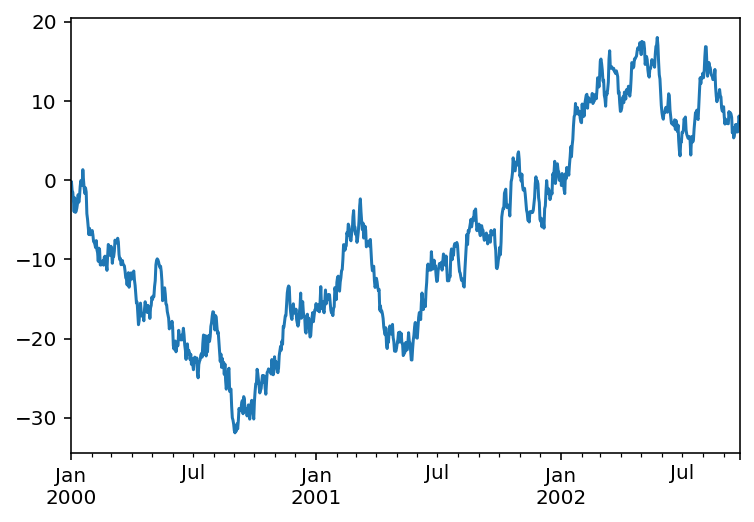

In [94]:
# ====================================================================================================
# ================================= Plotting a Series and a DataFrame ================================
# ====================================================================================================

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)) ## plot() on Series
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

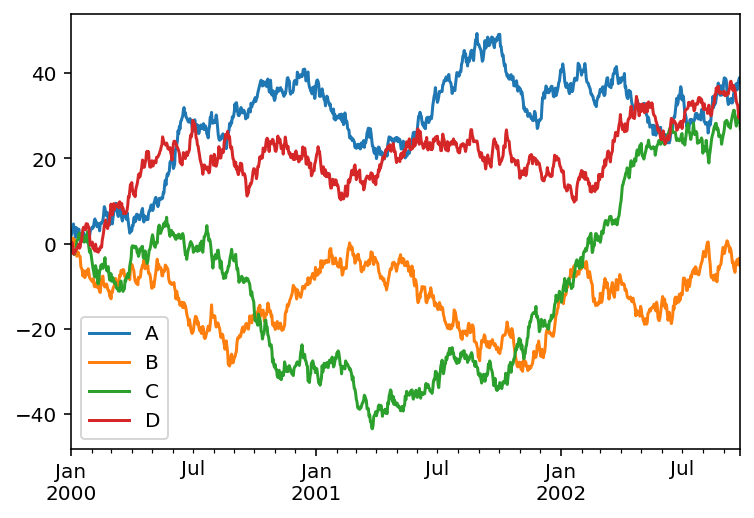

In [95]:
df = pd.DataFrame(np.random.randn(1000, 4), index= ts.index, columns=['A', 'B', 'C', 'D']) ## plot() on DataFrame
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV

In [96]:
# ====================================================================================================
# ============================== Writing to and reading froma  acsv file =============================
# ====================================================================================================

df.to_csv('foo.csv') ### writing to a cvs file

In [97]:
pd.read_csv('foo.csv') ### Reading from a csv file

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.530847,-0.525021,-1.045560,0.062065
1,2000-01-02,2.133266,-0.133479,-1.927410,-0.037353
2,2000-01-03,3.063670,1.030484,-1.650152,0.265988
3,2000-01-04,3.464633,1.270752,-1.549586,-0.714434
4,2000-01-05,4.604668,1.170669,-1.690843,-2.428507
...,...,...,...,...,...
995,2002-09-22,37.030895,-3.747935,28.511620,32.499126
996,2002-09-23,37.974372,-5.003154,30.221525,30.775135
997,2002-09-24,38.634141,-3.481943,28.667515,29.424150
998,2002-09-25,38.980505,-4.586153,28.655025,30.519251


### HDF5

In [98]:
# ====================================================================================================
# ============================== Writing to and reading from a HDF5 Store ============================
# ====================================================================================================

df.to_hdf('foo.h5','df') ### writing to a HDF5 Store

In [99]:
pd.read_hdf('foo.h5','df') ### Reading from a HDF5 Store

,A,B,C,D
2000-01-01,1.530847,-0.525021,-1.045560,0.062065
2000-01-02,2.133266,-0.133479,-1.927410,-0.037353
2000-01-03,3.063670,1.030484,-1.650152,0.265988
2000-01-04,3.464633,1.270752,-1.549586,-0.714434
2000-01-05,4.604668,1.170669,-1.690843,-2.428507
...,...,...,...,...
2002-09-22,37.030895,-3.747935,28.511620,32.499126
2002-09-23,37.974372,-5.003154,30.221525,30.775135
2002-09-24,38.634141,-3.481943,28.667515,29.424150
2002-09-25,38.980505,-4.586153,28.655025,30.519251


### Excel

In [100]:
# ====================================================================================================
# ============================== Writing to and reading from a Excel file ============================
# ====================================================================================================

df.to_excel('foo.xlsx', sheet_name='Sheet1') ### Writing to an excel file

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '0.9.8' or newer of 'xlsxwriter' (version '0.9.6' currently installed).
  warnings.warn(msg, UserWarning)


In [101]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col= None, na_values=['NA']) ### Reading from an excel file

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.530847,-0.525021,-1.045560,0.062065
1,2000-01-02,2.133266,-0.133479,-1.927410,-0.037353
2,2000-01-03,3.063670,1.030484,-1.650152,0.265988
3,2000-01-04,3.464633,1.270752,-1.549586,-0.714434
4,2000-01-05,4.604668,1.170669,-1.690843,-2.428507
...,...,...,...,...,...
995,2002-09-22,37.030895,-3.747935,28.511620,32.499126
996,2002-09-23,37.974372,-5.003154,30.221525,30.775135
997,2002-09-24,38.634141,-3.481943,28.667515,29.424150
998,2002-09-25,38.980505,-4.586153,28.655025,30.519251


Courtesy: https://pandas.pydata.org/pandas-docs/version/0.22.0/10min.html